In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
import seaborn as sn
import matplotlib.pyplot as plt
import joblib 
import pickle

In [2]:
dataframe = pd.read_csv('water_potability.csv',',')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataframe.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
dataframe.fillna(dataframe.mean(), inplace=True)

In [5]:
dataframe.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [6]:
predictors = dataframe.iloc[:,0:9].values
classes = dataframe.iloc[:,9].values

In [7]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
selector = SelectKBest(f_classif, k=3)

# Choose the best attributes to the model
selector.fit(predictors, classes)

# Show the name of the columns in the data set that are the best attributes to the model
cols = selector.get_support(indices=True)
features_df_new = dataframe.iloc[:,cols]

# show the columns that best contribute to the model
features_df_new.head()

,Solids,Chloramines,Organic_carbon
0,20791.318981,7.300212,10.379783
1,18630.057858,6.635246,15.180013
2,19909.541732,9.275884,16.868637
3,22018.417441,8.059332,18.436524
4,17978.986339,6.546600,11.558279


In [24]:
newdataframe = dataframe.filter(['Solids','Chloramines','Organic_carbon', 'Potability'])
newdataframe.tail(10)

,Solids,Chloramines,Organic_carbon,Potability
3266,14622.745494,7.547984,11.083027,1
3267,15921.412018,6.297312,9.899115,1
3268,17246.920347,7.708117,16.217303,1
3269,37188.826022,9.263166,16.172755,1
3270,26138.780191,7.747547,12.067620,1
3271,47580.991603,7.166639,13.894419,1
3272,17329.802160,8.061362,19.903225,1
3273,33155.578218,7.350233,11.039070,1
3274,11983.869376,6.303357,11.168946,1
3275,17404.177061,7.509306,16.140368,1


In [14]:
predictors = newdataframe.iloc[:,0:3].values
classes = newdataframe.iloc[:,3].values

In [15]:
predictors

array([[2.07913190e+04, 7.30021187e+00, 1.03797831e+01],
       [1.86300579e+04, 6.63524588e+00, 1.51800131e+01],
       [1.99095417e+04, 9.27588360e+00, 1.68686369e+01],
       ...,
       [3.31555782e+04, 7.35023323e+00, 1.10390697e+01],
       [1.19838694e+04, 6.30335653e+00, 1.11689462e+01],
       [1.74041771e+04, 7.50930586e+00, 1.61403676e+01]])

In [16]:
x_training, x_test, y_training, y_test = train_test_split(predictors, classes, test_size=0.3, random_state=0)

In [17]:
y_training

array([0, 0, 0, ..., 0, 0, 1])

In [18]:
# training the model
naive_bayes = GaussianNB()
naive_bayes.fit(x_training, y_training)

GaussianNB()

In [19]:
y_predicted = naive_bayes.predict(x_test)

In [20]:
mlaccuracy = accuracy_score(y_test,y_predicted)
mlaccuracy

0.6154628687690743

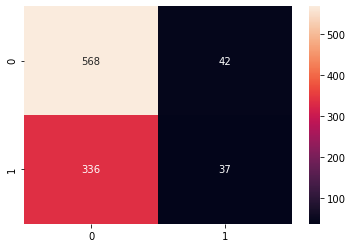

In [21]:
# confusion matrix
cf_matrix = confusion_matrix(y_test,y_predicted)
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()

In [22]:
# save model
joblib.dump(naive_bayes,'./naive_bayes.pkl')

['./naive_bayes.pkl']

In [23]:
f = open('naive_bayes.pkl', 'wb')
pickle.dump(naive_bayes, f)
f.close()
print ("Export the model to model.pkl")

Export the model to model.pkl
